In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
df.head()
                 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1: Do smokers have higher insurance charges than non-smokers?

In [7]:
# check how many customers in each group
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
# split data into two groups
non_smoker = df.loc[df['smoker']=='no'].copy()
smoker = df.loc[df['smoker']=='yes'].copy()

In [13]:
# isolate chargers in each data set
non_smoker_charges = non_smoker['charges']
smoker_charges = smoker['charges']

In [14]:
smoker_charges.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [17]:
mean_ns = np.mean(non_smoker_charges)
mean_s = np.mean(smoker_charges)

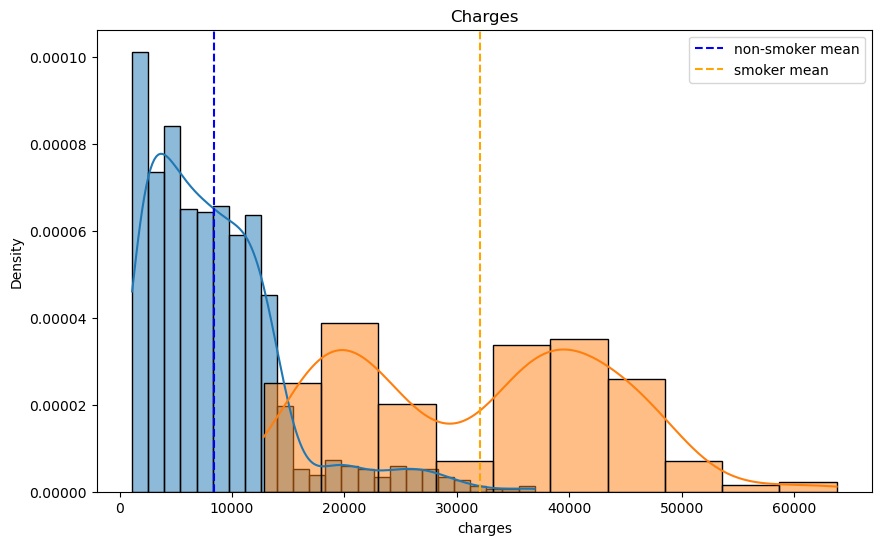

In [27]:
# visualize distribution of each group
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x=non_smoker_charges, stat='density',kde=True)
ax.axvline(mean_ns, color='blue',ls='--', label='non-smoker mean')

sns.histplot(x=smoker_charges, stat='density',kde=True)
ax.axvline(mean_s, color='orange', ls='--', label='smoker mean')

ax.set_title('Charges')
ax.legend();

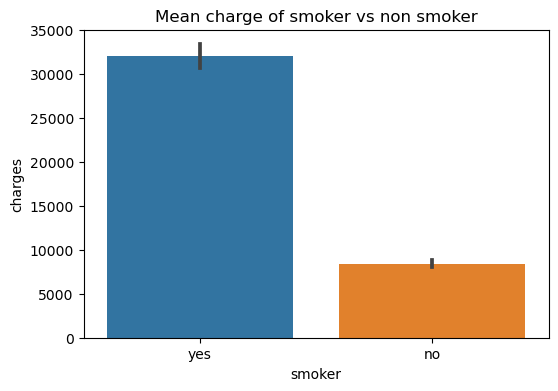

In [34]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=df['smoker'],y=df['charges'])
ax.set_title('Mean charge of smoker vs non smoker');

In [36]:
# check for outliers - ns
zscores = stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [38]:
# remove outliers - ns
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [39]:
# check for outliers - s
zscores = stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [40]:
# check normality - ns
results_non_smoker_charges = stats.normaltest(non_smoker_charges)
results_non_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [41]:
# check normality - s
results_smoker_charges = stats.normaltest(smoker_charges)
results_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

The p-values for both groups are below 0.05 which means the data is not normal, however,the sample size of each group is large enough (>15) to proceed without satisfying this test.

In [42]:
# check equal variance
result = stats.levene(non_smoker_charges, smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

The two samples do not have equal variance therefore I will incluse equal_var=False when performning the t-test

In [43]:
result = stats.ttest_ind(non_smoker_charges, smoker_charges, equal_var=False)
result

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)